# BIOEN/EE 460, CSE 490N
Intro to Neural Engineering
AUT 2021

Instructors: Chet Mortiz, Rajesh Rao  
Written by: Samantha Sun, Jon Mischler

## Homework 1

## Intro

Direct electrical stimulation can  be used to activate neural populations for a variety of applications, one of which is to provide artificial haptic feedback (sense of touch) by stimulating the primary somatosensory cortex, known as S1. In one experiment, researchers 
would either tap the subject’s finger with a touch probe, or electrically stimulate S1 to artificially evoke a similar sense 
of touch. The patient was then asked to push a button when they felt a touch sensation. The goal of this coding assignment is to 
compare the reaction times between the real vs. stimulated touch sensations. 

## The provided dataset includes:

> button - a vector of the button press signal, in samples

> t_estim - vector containing when electrical stimulation was delivered,
            in seconds

> t_probe - vector containing when touch probe stimulation was given, in
             seconds
 
> fs - sampling frequency of button signal

### Starter code
You can run each code section individually using the "Run" button in the menu or run the entire thing. Some code has been provided to get you oriented with the dataset.

In [1]:
# imports
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

## Importing data
If you're using Google Colab, you will need to upload your data file into your Google Drive in order for Colab to access it. This block will establish a link to your Google Drive in order to access the data file.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


You'll need to change the "fn" filename variable to your own personal path to the dataset. What you see below is my personal path, so running it as-is shouldn't work for you. The rest of the code will run given you've correctly imported the file.

In [3]:
fn = "/content/drive/My Drive/BIOEN 460/hw1_data.mat"

data = sio.loadmat(fn)
button = data['button']
fs = data['fs'][0]
t_estim = data['t_estim']
t_probe = data['t_probe']

In [4]:
# taking a closer look at the dataset
# you can print out the size of most arrays using the shape function
# you can also just print out the variable itself 

print('size of each variable')
print('button: ', button.shape)
print('t_estim: ', t_estim.shape)
print('t_probe: ', t_probe.shape)
print('fs: ', fs.shape)

print('value of fs: ', fs)

size of each variable
button:  (70000, 1)
t_estim:  (60, 1)
t_probe:  (37, 1)
fs:  (1,)
value of fs:  [100]


### Plotting 
Here we plot the button signal, making sure to label our axes we can more closely examine the signal by plotting a subsection of the signal. Feel free to play around with the indices that define the subsection (idx1, idx2)

Text(0.5, 1.0, 'button press signal - sample 20000 to 24000')

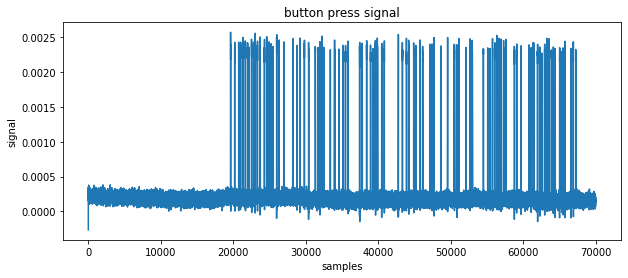

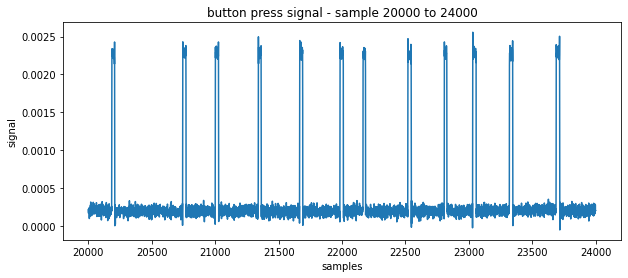

In [5]:
plt.figure(figsize=[10,4])
plt.plot(button)
plt.xlabel('samples')
plt.ylabel('signal')
plt.title('button press signal')

idx1 = 20000
idx2 = 24000

plt.figure(figsize=[10,4])
plt.plot(range(idx1,idx2),button[idx1:idx2])
plt.xlabel('samples')
plt.ylabel('signal')
plt.title('button press signal - sample ' + str(idx1) + ' to ' + str(idx2))

### samples vs. seconds
The button signal is sampled at a frequency of 100 Hz, which means that there are 100 data points collected every second. However, the timestamps for electrical stimulation and the tactor probe are given in seconds. To represent them in the same space, we need to either convert samples to seconds or vice versa. In the figure below, we've converted our stim times to samples

Text(0.5, 1.0, 'button press signal with estim and probe times - subsection')

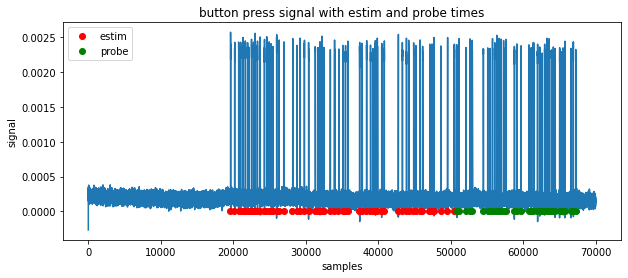

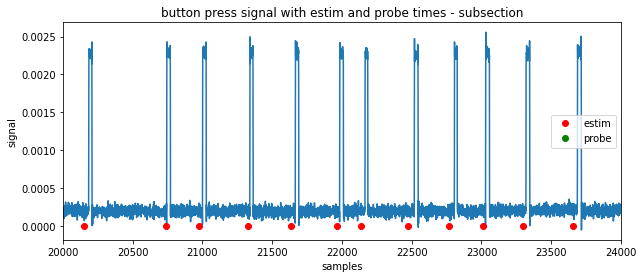

In [6]:
plt.figure(figsize=[10,4])
plt.plot(button)
plt.plot(t_estim*fs, np.zeros(t_estim.shape),'ro', label='estim');
plt.plot(t_probe*fs, np.zeros(t_probe.shape),'go', label='probe');
plt.xlabel('samples')
plt.ylabel('signal')
plt.legend()
plt.title('button press signal with estim and probe times')


plt.figure(figsize=[10,4])
plt.plot(range(idx1,idx2),button[idx1:idx2])
plt.plot(t_estim*fs, np.zeros(t_estim.shape),'ro', label='estim');
plt.plot(t_probe*fs, np.zeros(t_probe.shape),'go', label='probe');
plt.xlim([idx1,idx2])
plt.xlabel('samples')
plt.ylabel('signal')
plt.legend()
plt.title('button press signal with estim and probe times - subsection')

### Identifying button presses
In the figure from the last section, we can see that there are peaks in the signal whenever a button press has occured. One method of identifying these points in time is to set a threshold so that we detect every time the signal passes that threshold. 


Text(0.5, 1.0, 'button signal with button press markers - subsection')

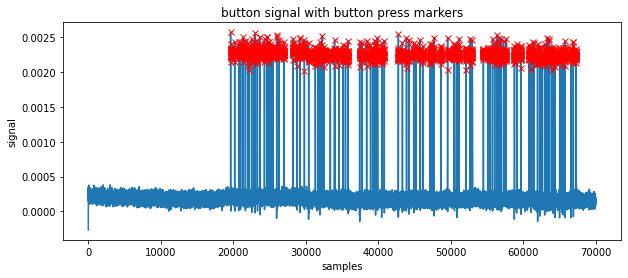

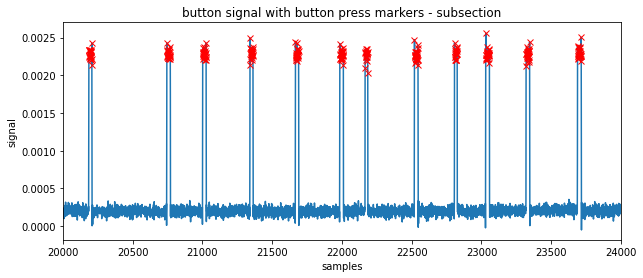

In [7]:
threshold = 0.002

button_press = np.where(button>threshold)[0]

plt.figure(figsize=[10,4])
plt.plot(button)
plt.plot(button_press, button[button_press],'rx')
plt.xlabel('samples')
plt.ylabel('signal')
plt.title('button signal with button press markers')

plt.figure(figsize=[10,4])
plt.plot(range(idx1,idx2),button[idx1:idx2])
plt.plot(button_press, button[button_press],'rx')
plt.xlim([idx1,idx2])
plt.xlabel('samples')
plt.ylabel('signal')
plt.title('button signal with button press markers - subsection')

You'll find that thresholding is a useful method but has the drawback of detecting several points in the signal that are above the threshold for each button press. However, we only want to find the first point in the signal where the button is pressed each time. Your task is to figure out a way to accomplish this. 

**MARIAM'S CODE FOR HW ANSWERS**

In [9]:
print(len(t_estim)) # electrical stimulation: 60 times

print(len(t_probe)) #touch probe stimulation: 37 times 

60
37


In [10]:
threshold = button > 0.002
threshold[1:][threshold[:-1] & threshold[1:]] = False
np.count_nonzero(threshold)   #number of button presses=97

97

In [11]:
#find the average reaction time of electrical stimulation and haptic touch
import pandas as pd
from statistics import mean 

t_estim  #vector of when electrical stimulation was delivered, in seconds
t_probe #vector of when touch probe stimulation was given, in seconds
#subtract each by a vector of time the button was pressed, and then take the avg of the vector (but you only take the first 60 values
#for the first one and then take the rest for the 2nd vector for subtracting then avging)

buttonPresses=np.where(threshold==True)[0] #isolate only where the threshold is surpassed
t_buttonPresses=buttonPresses/fs #converting from samples to seconds 

first_t_buttonPresses = t_buttonPresses[:60] #make sure you're using the first 60 values for subtraction
first_t_buttonPresses=np.transpose(first_t_buttonPresses) 
first_t_buttonPresses=first_t_buttonPresses.reshape((60, 1))
deltaT_estim = first_t_buttonPresses-t_estim #subtract in this order because button presses happen later, so greater t value
deltaT_estim.shape #checking my work
AvgTime_estim=np.average(deltaT_estim) #0.2463938381025727

last_t_buttonPresses = t_buttonPresses[-37:] #make sure you're using the last 37 values for subtraction
last_t_buttonPresses=np.transpose(last_t_buttonPresses) 
last_t_buttonPresses=last_t_buttonPresses.reshape((37, 1))
deltaT_probe = last_t_buttonPresses-t_probe #subtract in this order because button presses happen later, so greater t value
deltaT_probe.shape #checking my work
AvgTime_probe=np.average(deltaT_probe) #0.052088480863425185

print(AvgTime_estim, AvgTime_probe)

0.2463938381025727 0.052088480863425185


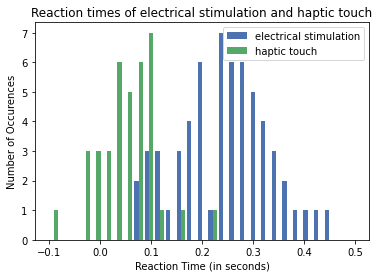

In [16]:
import numpy as np
import matplotlib.pyplot as plt
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 

plt.style.use('seaborn-deep')

x = deltaT_estim
y = deltaT_probe
bins = np.linspace(-.1, .5, 30)

plt.hist([x, y], bins, label=["electrical stimulation", "haptic touch"])
plt.legend(loc='upper right')
plt.title('Reaction times of electrical stimulation and haptic touch')
plt.xlabel('Reaction Time (in seconds)')
plt.ylabel('Number of Occurences')
plt.show()